In [151]:
import numpy as np # all matheatical/algebric calculations
import pandas as pd # all csv related functions
import matplotlib.pyplot as plt #plots and visualisations
import seaborn as sb
from sklearn.svm import SVR
from sklearn.model_selection import KFold
#from scipy.optimize import fmin_tnc
import scipy.optimize as opt
%matplotlib inline

In [50]:
data=pd.read_csv("C:/Users/Priyanshu/Desktop/Machine Learning/Assignment1/diabetes.csv")

In [51]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### It is an important task of a Data scientist to prepossess the data by filling missing values because making the right decision on how to handle it generates robust data models. It is important to be handled as they could lead to wrong prediction or classification for any given model being used.


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### This indicates that there are no missing values but this is not the final conclusion unless we check the "NAN"

In [53]:
data.loc[data["Glucose"] == 0.0, "Glucose"] = np.NAN
data.loc[data["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
data.loc[data["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
data.loc[data["Insulin"] == 0.0, "Insulin"] = np.NAN
data.loc[data["BMI"] == 0.0, "BMI"] = np.NAN
data.loc[data["Age"] == 0.0, "Age"] = np.NAN
data.loc[data["DiabetesPedigreeFunction"] == 0.0, "DiabetesPedigreeFunction"] = np.NAN

data.isnull().sum()[1:8]

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

#### There are missing values in 5 columns which have numerical values: Glucose, Blood Pressure, Skin Thickness, Insulin, BMI. So replacing the missing values with mean of the respective columns

In [54]:
data['Glucose'] = data['Glucose'].fillna((data['Glucose'].mean()))
data['BloodPressure'] = data['BloodPressure'].fillna((data['BloodPressure'].mean()))
data['SkinThickness'] = data['SkinThickness'].fillna((data['SkinThickness'].mean()))
data['Insulin'] = data['Insulin'].fillna((data['Insulin'].mean()))
data['BMI'] = data['BMI'].fillna((data['BMI'].mean()))

#### Checking if all the NAN are now filled with mean values

In [55]:
data.loc[data["Glucose"] == 0.0, "Glucose"] = np.NAN
data.loc[data["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
data.loc[data["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
data.loc[data["Insulin"] == 0.0, "Insulin"] = np.NAN
data.loc[data["BMI"] == 0.0, "BMI"] = np.NAN

data.isnull().sum()[1:8]

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

#### Extracting Y dataset with only 1 column that is the 'Outcome' column and rest all columns in X dataset

In [76]:
### Y dataset containing only Outcome column
y = data.iloc[:, [-1]]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [56]:
### X dataset containing all columns columns
X = data.iloc[:, :-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50.0
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31.0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32.0
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21.0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33.0
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30.0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26.0
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29.0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53.0
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54.0


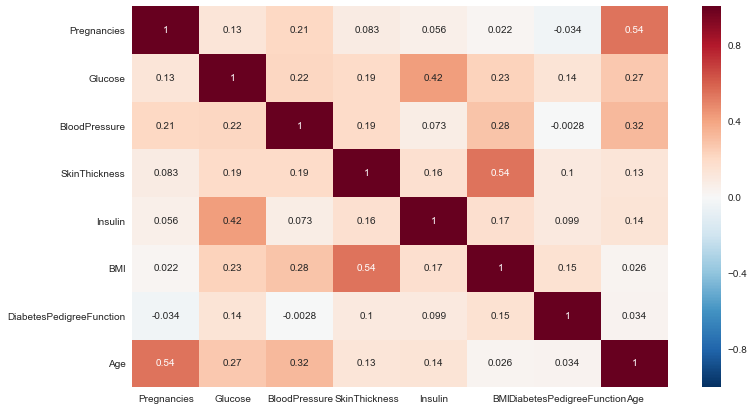

In [58]:
#corralation between each column
corr = X.corr()
plt.figure(figsize=(12, 7))
sb.heatmap(corr, annot=True)

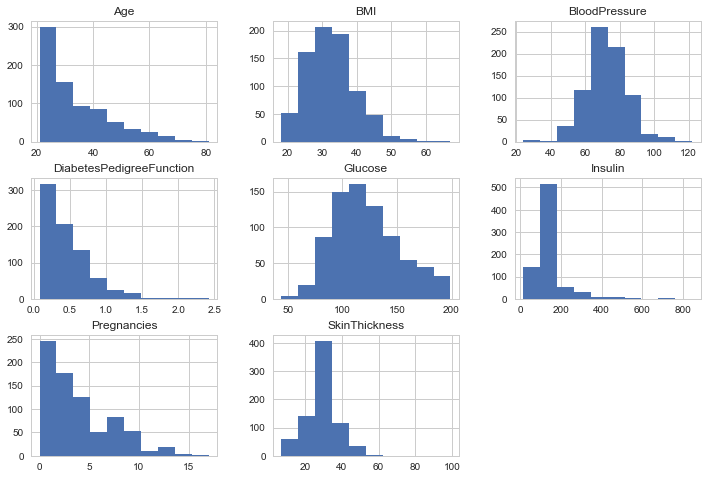

In [59]:
#Histogram
X.hist(figsize=(12, 8))
plt.show()

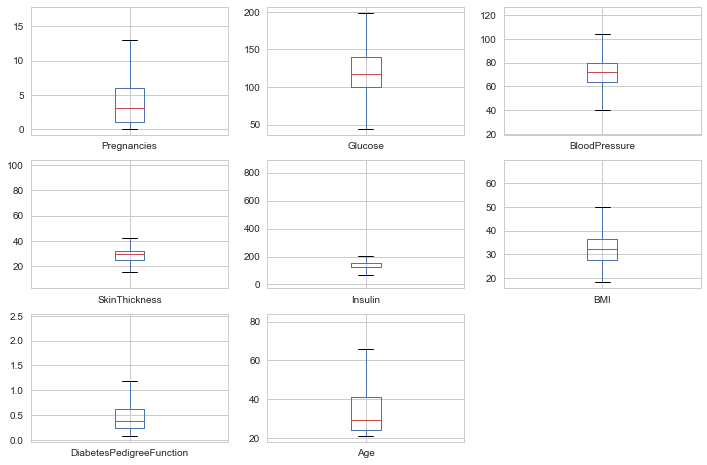

In [60]:
#Boxplot of each column
X.plot(kind='box', figsize=(12, 8), subplots=True, layout=(3, 3))
plt.show()

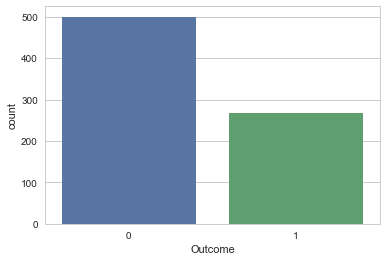

In [61]:
#plot the outcome values
sb.countplot(x='Outcome', data=y)
plt.show()

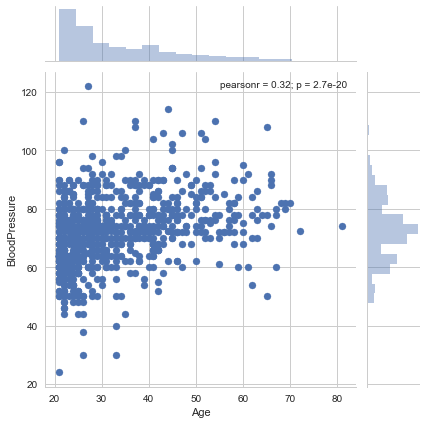

In [62]:
sb.jointplot(x='Age',y='BloodPressure',data=X)

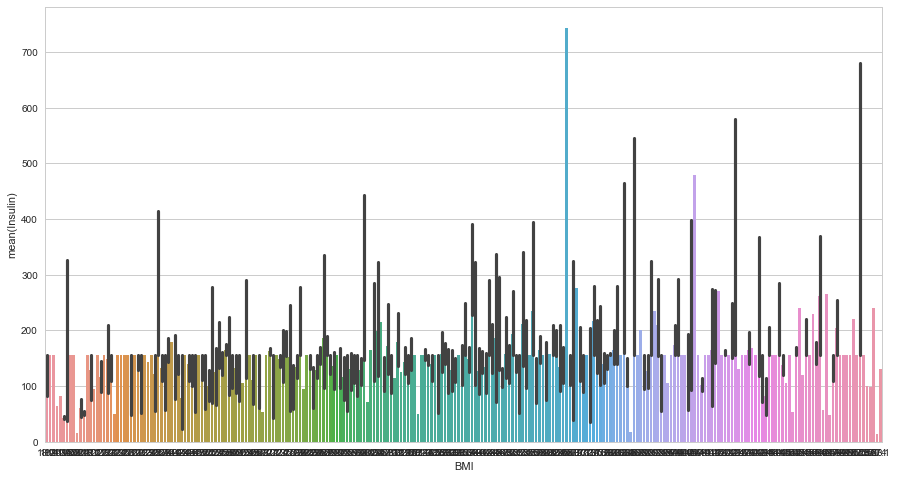

In [65]:
sb.set(style="whitegrid")
plt.figure(figsize=(15,8))

ax=sb.barplot(x="BMI", y="Insulin", data=X,)

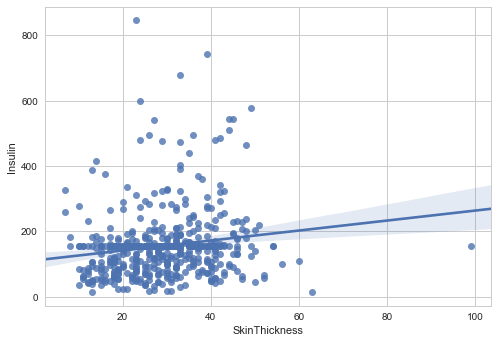

In [66]:
sb.regplot(x='SkinThickness', y= 'Insulin', data=X)

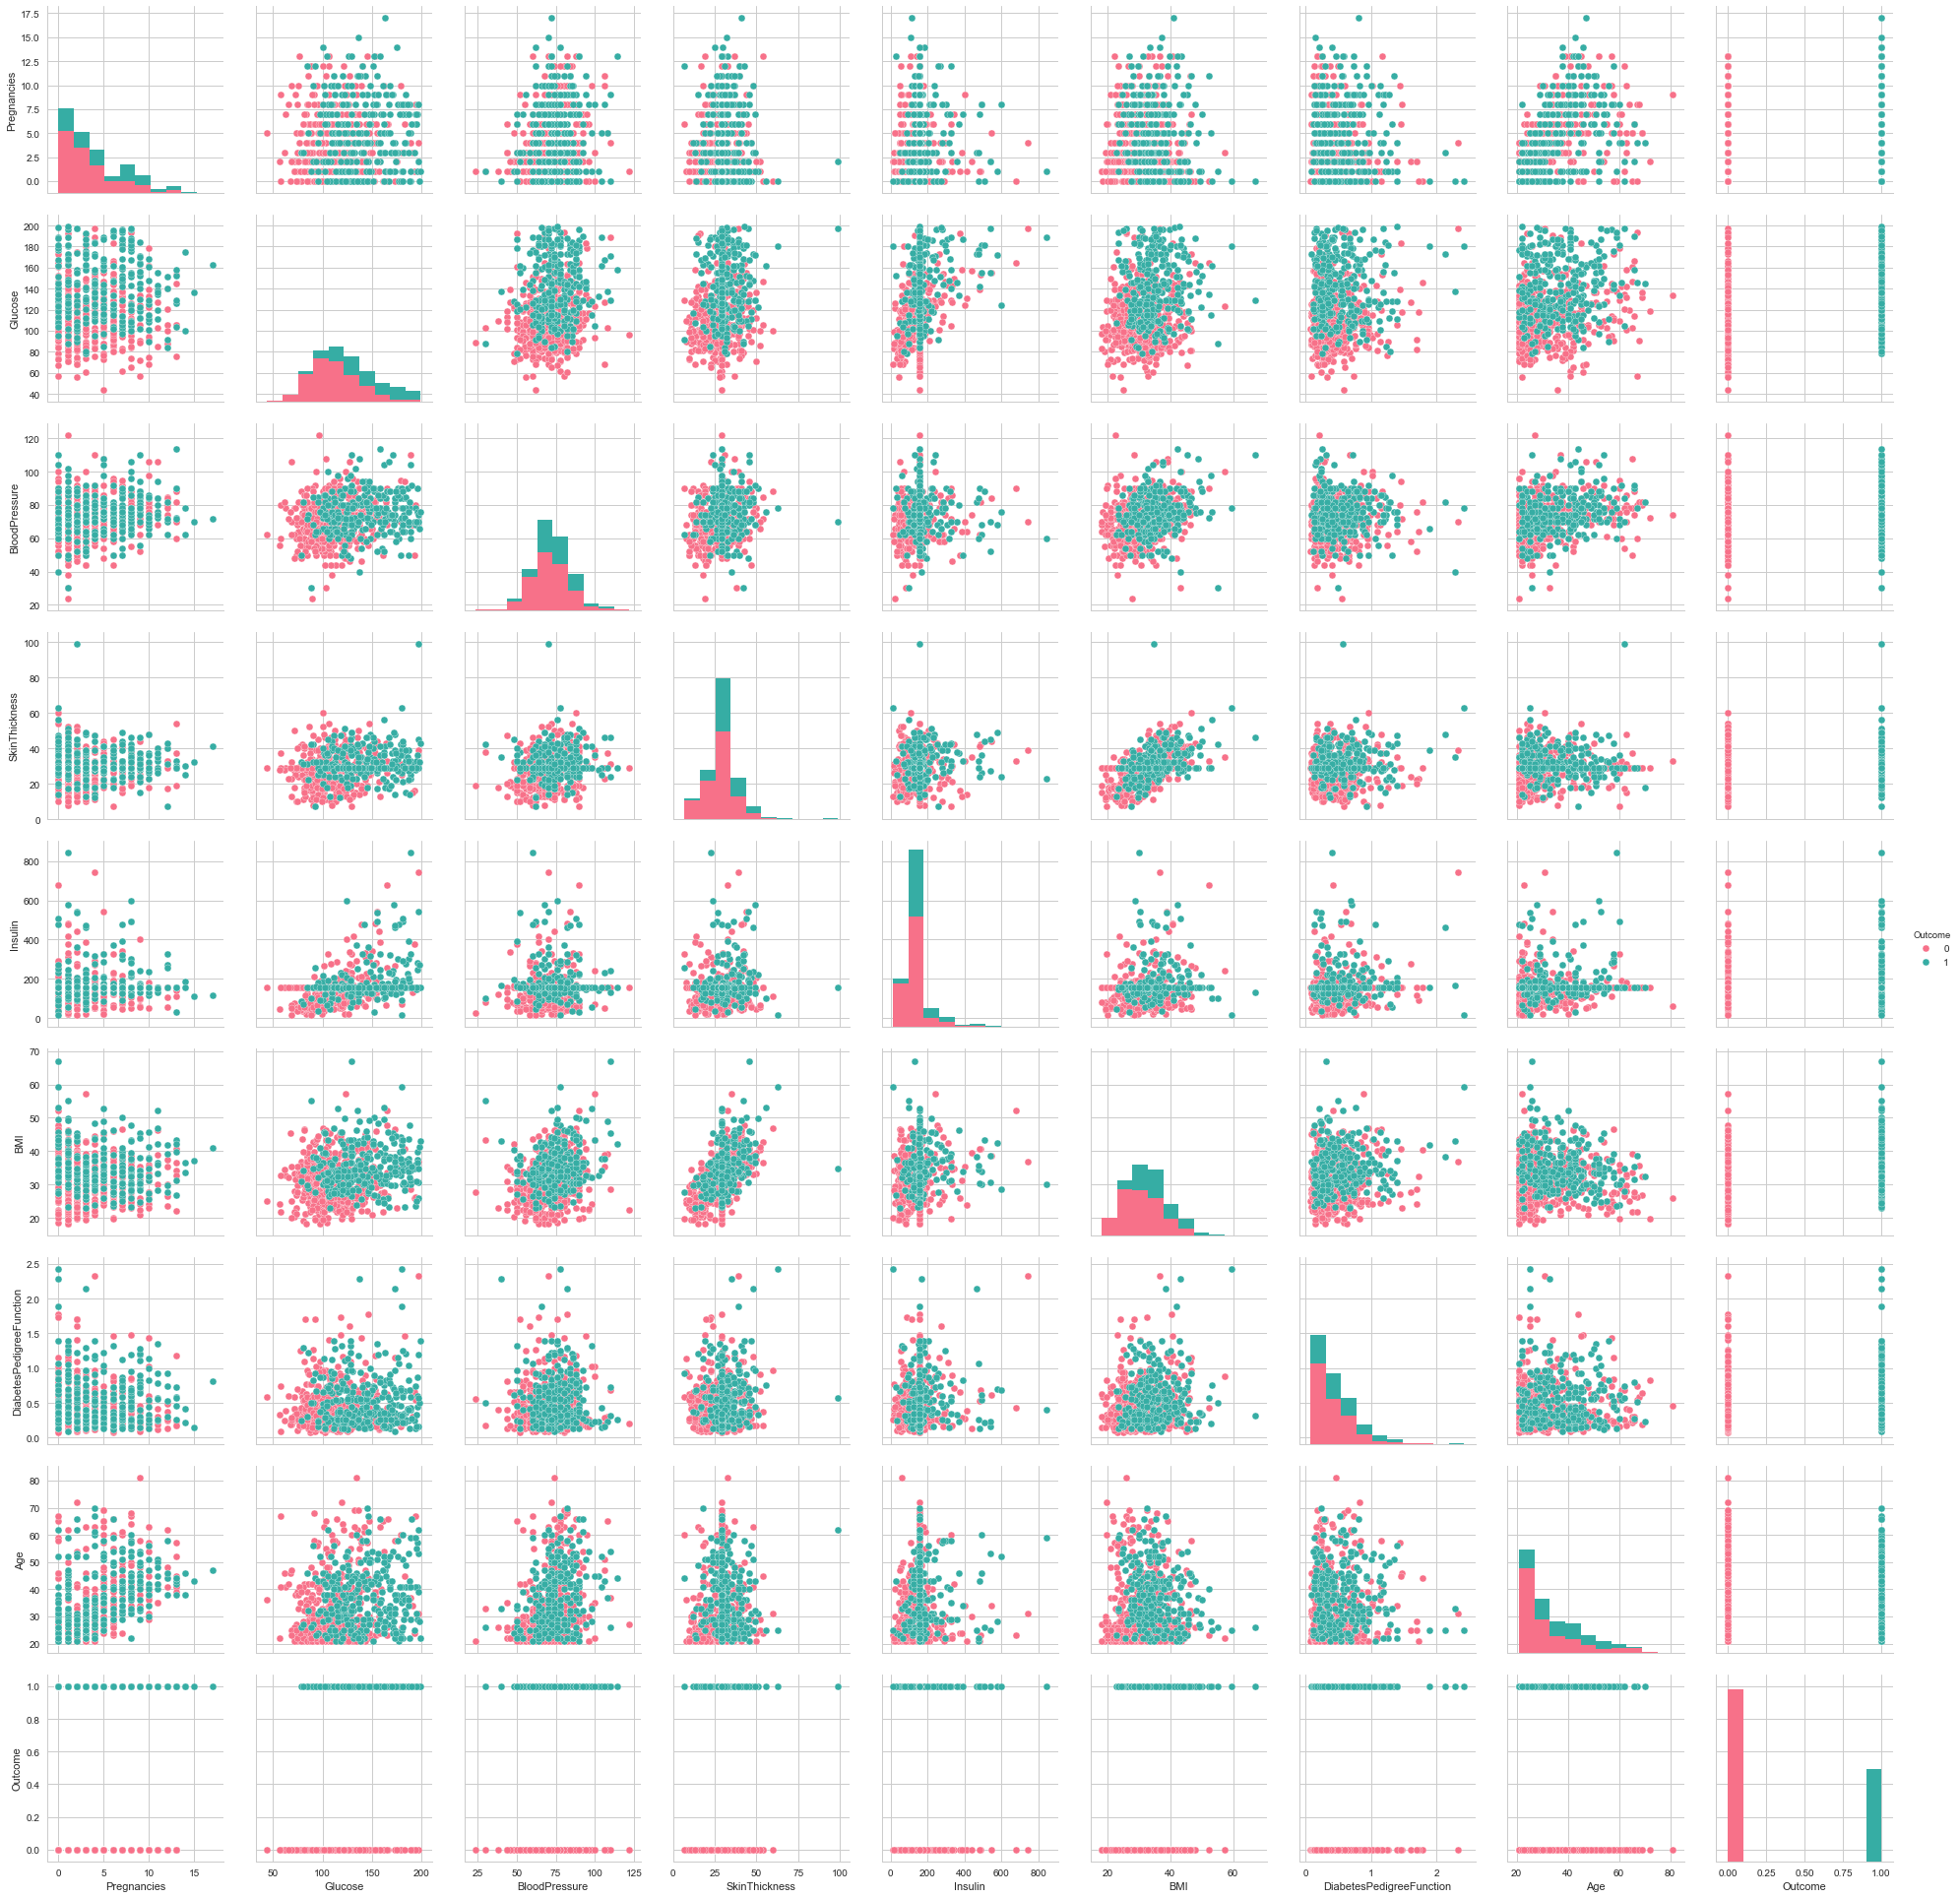

In [67]:
#pair plot of each attributes
sb.pairplot(data, size=3, hue='Outcome', palette='husl',)
plt.show()

In [35]:
# #### Splitting data into training and test data
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [68]:
#### Splitting data into training and test data
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [70]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X,y):
    print("Train Index: ", train_index,"Test Index: ", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 

C:\Users\Priyanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274
 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310
 311 312 313 314 315 316 317 318 319 

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

In [143]:
#Initialze training parameters
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [155]:
### some functions that will be used to compute the cost
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [145]:
### we define the cost and the gradient function
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,x)) - y)


In [154]:
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y))
    return opt_weights[0]

parameters = fit(X, y, theta)

TypeError: fit() missing 1 required positional argument: 'theta'

In [158]:
### Logistic Regression using sklearn
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

C:\Users\Priyanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
predictions = logisticRegr.predict(X_test)

In [160]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.802631578947
